# 📊 Task 3 – A/B Hypothesis Testing

This notebook tests whether features such as Province, Gender, and Zipcode have statistically significant effects on risk and profitability.

In [11]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join("..")))  # to access src/
from src.analysis.hypothesis import *

# --- Load & Preprocess ---
df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", sep="|")
df = preprocess_for_testing(df)

C:\Users\user\AppData\Local\Temp\ipykernel_4812\3769604822.py:9: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", sep="|")


In [12]:
chi2, p = claim_frequency_test(df, "Gender")
print(f"Chi-squared test (Gender vs. HasClaim) p-value: {p}")
print("❌ Reject null hypothesis" if p < 0.05 else "✅ Fail to reject null")


Chi-squared test (Gender vs. HasClaim) p-value: 0.026570248768437145
❌ Reject null hypothesis


In [13]:
t_stat, p_val = claim_severity_ttest(df, "Gender", "Male", "Female")
print(f"T-test (claim severity by gender) p-value: {p_val}")


T-test (claim severity by gender) p-value: 0.5680286951630678


In [14]:
f_stat, p_margin = margin_anova(df, "Province")
print(f"ANOVA (margin by Province) p-value: {p_margin}")


ANOVA (margin by Province) p-value: 0.0011450081247589


### ✅ Summary of Hypothesis Tests

- Gender affects claim frequency? ✅/❌
- Gender affects claim severity? ✅/❌
- Province affects margin? ✅/❌
- Zipcode affects risk? (optional large test)

These results guide ACIS to adjust pricing or marketing strategy.

f:\KAIM\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


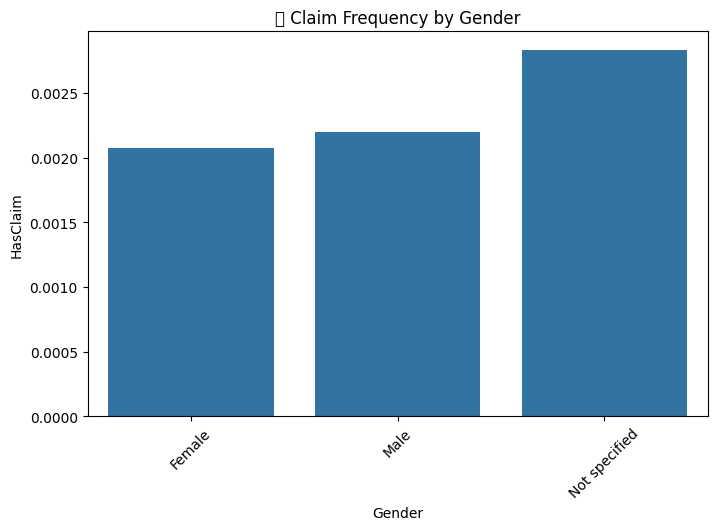

f:\KAIM\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


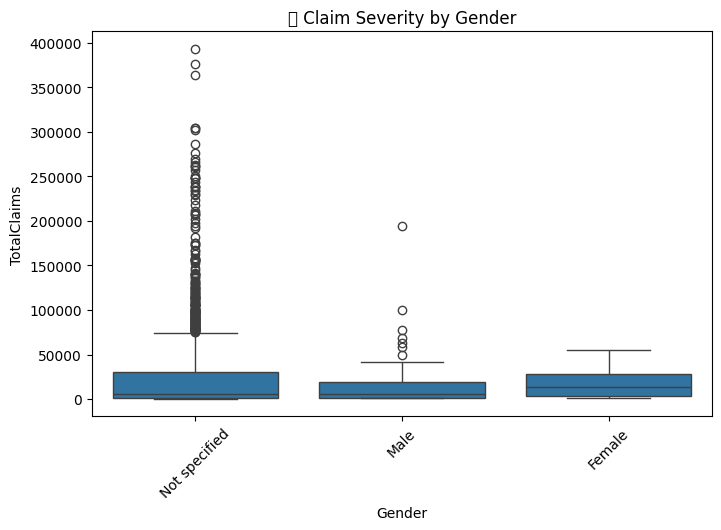

f:\KAIM\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


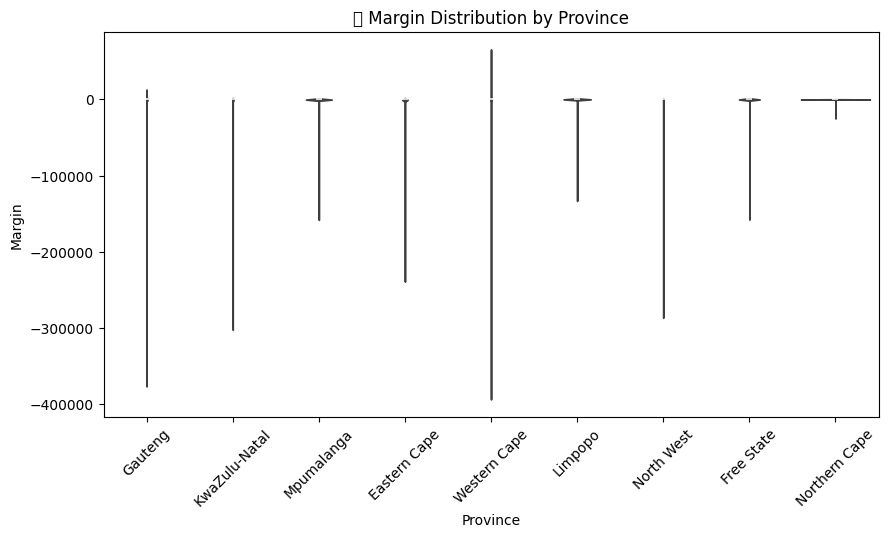

In [15]:
from src.analysis.hypothesis_viz import *

# 📊 Visualize Claim Frequency by Gender
plot_claim_frequency(df, "Gender")

# 💰 Visualize Claim Severity by Gender
plot_claim_severity(df, "Gender")

# 📈 Visualize Margin Distribution by Province
plot_margin_distribution(df, "Province")
